In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = 'D:\Lari stuff\Data Analytics\Module 8 - ETL Extract Transform Load\Movies-ETL'
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [3]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [5]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14213,False,NaN,0,"[{'id': 37, 'name': 'Western'}]",NaN,38670,tt0064300,it,Un esercito di cinque uomini,"Set during the Mexican Revolution, a man known...",...,1969-10-16,0.0,105.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,The Five Man Army,False,6.6,5.0
17910,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,61645,tt0031311,en,First Love,"In this reworking of Cinderella, orphaned Conn...",...,1939-11-10,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,First Love,False,8.5,2.0
35909,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,108246,tt0032487,en,Forty Little Mothers,An out-of-work professor gets a break from an ...,...,1940-04-26,0.0,90.0,[],Released,NaN,Forty Little Mothers,False,5.0,1.0
8638,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",NaN,36446,tt0064122,en,Camille 2000,This story from Alexander Dumas is updated to ...,...,1969-07-15,0.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Camille 2000,False,6.4,5.0
27507,False,"{'id': 87252, 'name': 'Halloweentown Collectio...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",http://disneydvd.disney.go.com/halloweentown-h...,34560,tt0414078,en,Halloweentown High,Marnie Piper prepares to begin a new school ye...,...,2004-10-08,0.0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Halloweentown High,False,5.9,67.0


In [6]:
# check if all of the columns came in as the correct data types
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [7]:
kaggle_metadata["popularity"].sample(n=5)

45005    0.058303
23886    0.912787
10997    0.662855
18277    2.255865
29658    1.065237
Name: popularity, dtype: object

In [8]:
# Before we convert the "adult" and "video" columns, we want to check that all the values are either True or False.
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [9]:
# Remove the bad data
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# The following code will keep rows where the adult column is False, and then drop the adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [11]:
# look at the values of the video column
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [12]:
# This converts into booleand and creates the Boolean column we want
# kaggle_metadata['video'] == 'True'

#We assign it to video
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [13]:
# For the numeric columns, we can just use the to_numeric() method from Pandas.
# We'll make sure the errors= argument is set to 'raise', so we'll know if there's any
# data that can't be converted to numbers.

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [14]:
# Convert release date to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [15]:
ratings.info(null_counts=True)

C:\Users\silve\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [16]:
# We'll specify in to_datetime() that the origin is 'unix' and the time unit is seconds
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [17]:
# Assign to the timestamp column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

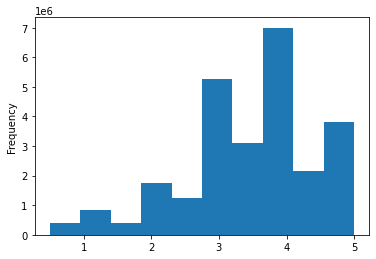

In [18]:
# look at the statistics of the actual ratings and see if there are any glaring errors
# easy way to do this is to look at a histogram of the rating distributions,
# and then use the describe() method to print out some stats on central tendency and spread
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [20]:
# MARK HELP!!! from this part MARK MARK MARK MARK MARK MARK MARK XD
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

NameError: name 'wiki_movies_df' is not defined

In [22]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle              Drop Wikipedia
# running_time             runtime                   Keep Kaggle, fill in zeros with wikipedia data
# budget_wiki              budget_kaggle             Keep Kaggle; fill in zeros with Wikipedia data.
# box_office               revenue                   Keep Kaggle; fill in zeros with Wikipedia data.
# release_date_wiki        release_date_kaggle       Drop Wikipedia.
# Language                 original_language         Drop Wikipedia
# Production company(s)    production_companies

In [23]:
# take a quick look at some of the title
movies_df[['title_wiki','title_kaggle']]

NameError: name 'movies_df' is not defined

In [ ]:
# Look at the rows where the titles don't match
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

In [ ]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

In [ ]:
# fill in missing values with zero and make the scatter plot
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

In [ ]:
# Since budget_wiki and budget_kaggle are numeric, we'll make another scatter plot to compare the values
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

In [ ]:
# The box_office and revenue columns are numeric, so we'll make another scatter plot
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

In [ ]:
# Let's look at the scatter plot for everything less than $1 billion in box_office
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

In [ ]:
# regular line plot (which can plot date data), and change the style
# to only put dots by adding style='.' to the plot() method
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [ ]:
# We'll look for any movie whose release date according to Wikipedia is after 1996,
# but whose release date according to Kaggle is before 1965
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

In [ ]:
# Then we can drop that row
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [ ]:
# see if there are any null values
movies_df[movies_df['release_date_wiki'].isnull()]

In [ ]:
# For the language data, we'll compare the value counts of each
movies_df['Language'].value_counts()

# This code throws an error because some of the language data points are stored as lists
#TypeError: unhashable type: 'list'

In [ ]:
# We need to convert the lists in Language to tuples so that the value_counts() method will work
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

In [ ]:
# For the Kaggle data, there are no lists, so we can just run value_counts() on it.
movies_df['original_language'].value_counts(dropna=False)

In [ ]:
# we'll start off just taking a look at a small number of samples production companies
movies_df[['Production company(s)','production_companies']]

In [ ]:
# First, we'll drop the title_wiki, release_date_wiki, Language, and Production company(s) columns.
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

In [ ]:
#we'll make a function that fills in missing data for a column pair and then drops the redundant column
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [ ]:
# Now we can run the function for the three column pairs that we decided to fill in zeros.
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

In [ ]:
# Check that there aren't any columns with only one value, since that doesn't really provide any information.
# We need to convert lists to tuples for value_counts() to work.

for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

In [ ]:
# we see that 'video' only has one value
movies_df['video'].value_counts(dropna=False)

In [ ]:
# one way to reorder the columns
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [ ]:
# rename the columns to be consistent
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [ ]:
# use a groupby on the "movieId" and "rating" columns and take the count for each group
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count()

In [ ]:
# Then we'll rename the "userId" column to "count." THIS IS A POSSIBLE ERROR, ASK MARK
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1)